## Gradio Pets

Note: you can type "#|" at the top of each cell you want to export to a (non-notebook) Python file.  This can be handy to use as your Gradio app to run in HF.

In [1]:
!pip install -Uqq fastai
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 5.2 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 106 kB 60.3 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 272 kB 48.2 MB/s 
     |████████████████████████████████| 212 kB 60.7 MB/s 
     |████████████████████████████████| 2.3 MB 57.1 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 80 kB 8.2 MB/s 
     |████████████████████████████████| 68 kB 6.3 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 856 kB 43.9 MB/s 
     |████████████████████████████████| 4.0 MB 42

In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 5.0 MB/s 
     |████████████████████████████████| 441 kB 35.7 MB/s 
     |████████████████████████████████| 5.3 MB 48.4 MB/s 
     |████████████████████████████████| 1.3 MB 39.3 MB/s 
     |████████████████████████████████| 1.6 MB 40.6 MB/s 
     |████████████████████████████████| 163 kB 38.8 MB/s 
     |████████████████████████████████| 115 kB 51.8 MB/s 
     |████████████████████████████████| 212 kB 45.9 MB/s 
     |████████████████████████████████| 127 kB 37.5 MB/s 
     |████████████████████████████████| 115 kB 18.5 MB/s 
     |████████████████████████████████| 7.6 MB 20.6 MB/s 
Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *
import gradio as gr

In [4]:
def is_cat(x): return x[0].isupper() 

In [5]:
ims = search_images_ddg('dog', 1)
ims

(#1) ['http://4.bp.blogspot.com/_LDF9z4ZzZHo/TQALq2yMaHI/AAAAAAAAAKM/GF2lEUQ1Qag/s1600/1600DOG_13020.jpg']

In [6]:
dest = 'dog.jpg'
download_url(ims[0], dest)

Path('dog.jpg')

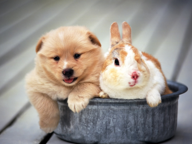

In [7]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [8]:
# This model was trained in 'dog-cat-model-create.ipynb', saved, and imported here
# after uploading.
learn = load_learner('dog-cat-model.pkl')

In [9]:
# In Jupyter, you can use %time for running stats
%time learn.predict(im)

# Results are predicting whether this is a cat

CPU times: user 182 ms, sys: 31.5 ms, total: 213 ms
Wall time: 591 ms


('False', TensorBase(0), TensorBase([9.9997e-01, 3.0219e-05]))

In [10]:
# Now we want to classify images as 'Dog' or 'Cat'
# This is the function required by Gradio; it must return data structure as shown
# below (dict via zip).  Gradio doesn't yet support PyTorch tensors, so we convert
# them to floats
categories = ('Dog', 'Cat')

def classify_image(img):
  pred,idx,probs = learn.predict(img)
  return dict(zip(categories, map(float,probs)))

In [11]:
classify_image(im)

{'Dog': 0.9999698400497437, 'Cat': 3.021855081897229e-05}

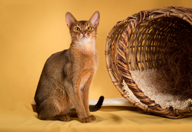

In [12]:
# Create/save a cat image using code same as above for dog
ims2 = search_images_ddg('cat', 1)
dest2 = 'cat.jpg'
download_url(ims2[0], dest2)
im2 = PILImage.create('cat.jpg')
im2.thumbnail((192,192))
im2

In [14]:
# These images also need to be created or uploaded first
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg']

# The Gradio interface
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://864b41b8050529f4.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f0b82b94ad0>,
 'http://127.0.0.1:7860/',
 'https://864b41b8050529f4.gradio.app')

In [ ]:
# This is actually running the app in GCP (if using Colab), so you need to stop the session to
# stop the app.